# 线性代数模型

线性代数是处理矩阵和向量空间的数学分支，在很多实际领域都有应用。本章主要结合斐波那契数列、莱斯利模型和PageRank算法，介绍特征值和特征向量的应用。最后给出奇异值分解在推荐算法和图像压缩中的应用。


## 1 特征值与特征向量

### 1.1 差分方程
斐波那契（Fibonacci）数列的通项。

斐波那契在13世纪初提出，一对兔子出生一个月后开始繁殖，每个月出生一对新生兔子，假定兔子只繁殖，没有死亡，问第 个月月初会有多少对兔子？
以对为单位，每个月繁殖兔子对数构成一个数列，这便是著名的斐波那契数列：1，1，2，3，5，8，⋯，
$$
此数列F_k满足条件F_0=1,F_1=1,F_(k+2)=F_(k+1)+F_k,k=0,1,2,⋯.\tag{1}
$$

解法一：运用特征值和特征向量求 的通项。
首先将二阶差分方程(1)化成一阶差分方程组。式(1)等价于
$$
\begin{cases}
F_{k + 1} & = & F_{k + 1} \\
F_{k + 2} & = & F_{k + 1} + F_k\\
\end{cases}
$$
写成矩阵形式为：
$$
\alpha_{k + 1} = A\alpha_k, \, k = 0, 1, 2, ...\tag{2}
$$
其中：
$$
A = \begin{bmatrix}
0 & 1\\
1 & 1\\
\end{bmatrix}, \, \alpha_k = \begin{bmatrix}
F_k\\
F_{k + 1}
\end{bmatrix}, \, \alpha_0 = \begin{bmatrix}
1\\
1\\
\end{bmatrix}
$$
我们令$P = \begin{bmatrix}
-\frac{\sqrt{5} + 1}{2} & \frac{\sqrt{5} - 1}{2}\\
1 & 1\\
\end{bmatrix}$, 于是有：
$$
A = P\begin{bmatrix}
\lambda_1 & 0\\
0 & \lambda_2\\
\end{bmatrix}P^{-1}, A^k = P\begin{bmatrix}
\lambda_1^k & 0\\
0 & \lambda_2^k\\
\end{bmatrix}P^{-1}
$$
所以有：

$$
\alpha_k = A^k \alpha_0 = A^k \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix}
(1 - \sqrt{5})^k + \sqrt{5}(1 + \sqrt{5})^k + \frac{3}{\sqrt{5} + 5}(1 + \sqrt{5})^k \\
2 \cdot 5^k (1 - \sqrt{5})^{k + 1} + \frac{5 + 3\sqrt{5}}{10}(1 + \sqrt{5})^k
\end{bmatrix}
$$
所以有$F_k = 1 - \sqrt{5})^k + \sqrt{5}(1 + \sqrt{5})^k + \frac{3}{\sqrt{5} + 5}(1 + \sqrt{5})^k$

In [13]:
import sympy as sp
sp.var('k', positive=True, integer=True)
a = sp.Matrix([[0, 1], [1, 1]])
val = a.eigenvals()
vec = a.eigenvects()
P, D = a.diagonalize()
ak = P @ (D ** k) @ (P.inv())
F = ak @ sp.Matrix([1, 1])
s = sp.simplify(F[0])//化简
print(s)
sm = []
for i in range(20):
    sm.append(s.subs(k, i).n())
print(sm)

NameError: name '化简' is not defined

解法二：差分方程的特征根解法。
差分方程的特征方程为
$$
\lambda^2 - \lambda - 1 = 0
$$
特征根分别为$\frac{1 - \sqrt{5}}{2}, \frac{1 + \sqrt{5}}{2}$是互异的。则有：
$$
F_k = c_1(\frac{1 - \sqrt{5}}{2})^k + c_2(\frac{1 + \sqrt{5}}{2})^k
$$
从而有方程组：
$$
\begin{cases}
c_1 + c_2 & = & 1\\
c_1(\frac{1 - \sqrt{5}}{2}) + c_2(\frac{1 + \sqrt{5}}{2}) & = & 1\\
\end{cases}
$$
由此方程组解得$c_1=(\frac{1}{2}-\frac{\sqrt{5}}{10})，c_2=(\frac{1}{2}+\frac{\sqrt{5}}{10})$

In [4]:
import sympy as sp
sp.var('t, c1, c2')
t0 = sp.solve(t ** 2 - t - 1)
eq1 = c1 + c2 - 1
eq2 = c1 * t0[0] + c2 * t0[1] - 1
s = sp.solve([eq1, eq2])
print('c1 = ', s[c1]); print('c2 = ', s[c2])

c1 =  1/2 - sqrt(5)/10
c2 =  sqrt(5)/10 + 1/2


解法三：直接利用Python软件求解。

In [5]:
import sympy as sp
sp.var('k'); y = sp.Function('y')
f = y(k+2)-y(k+1)-y(k)
s = sp.rsolve(f, y(k),{y(0):1,y(1):1})
print(s)

(1/2 - sqrt(5)/2)**k*(1/2 - sqrt(5)/10) + (1/2 + sqrt(5)/2)**k*(sqrt(5)/10 + 1/2)


## 2 莱斯利（Leslie）种群模型
莱斯利模型是研究动物种群数量增长的重要模型，这一模型研究了种群中雌性动物的年龄分布和数量增长的规律。
在某动物种群中，仅考察雌性动物的年龄和数量。设雌性动物的最大生存年龄为$L$（单位：年或其他时间单位），把$[0, L]$等分为$n$个年龄组，每一年龄组的长度为$\frac{L}{n}$，$n$个年龄组分别为：
$$
[0, \frac{L}{n}), \,\,[\frac{L}{n}, \frac{2L}{n}), ...
$$

In [10]:
import numpy as np
import sympy as sp

X0 = np.array([500, 1000, 500])
L = np.array([[0, 4, 3], [0.5, 0, 0], [0, 0.25, 0]])
X1 = L @ X0; X2 = L @ X1  #@表示矩阵乘法
X3 = L @ X2

Ls = sp.Matrix([[0, 4, 3], [sp.Rational(1,2), 0, 0],
                [0, sp.Rational(1,4), 0]])  #符号矩阵, sp.Rational(1,2) 表示 1/2
sp.var('lamda')  #定义符号变量
p = Ls.charpoly(lamda)  #计算特征多项式
w1 = sp.roots(p)     #计算特征值
w2 = Ls.eigenvals()  #直接计算特征值
v = Ls.eigenvects()  #直接计算特征向量
print("特征值为：",w2)
print("特征向量为：\n",v)
P, D = Ls.diagonalize()  #相似对角化
Pinv = P.inv()  #求逆阵
Pinv = sp.simplify(Pinv)
cc = Pinv @ X0
print('P=\n', P)
print('c=', cc[0])

特征值为： {3/2: 1, -3/4 - sqrt(5)/4: 1, -3/4 + sqrt(5)/4: 1}
特征向量为：
 [(3/2, 1, [Matrix([
[18],
[ 6],
[ 1]])]), (-3/4 - sqrt(5)/4, 1, [Matrix([
[3*sqrt(5) + 7],
[ -3 - sqrt(5)],
[            1]])]), (-3/4 + sqrt(5)/4, 1, [Matrix([
[7 - 3*sqrt(5)],
[ -3 + sqrt(5)],
[            1]])])]
P=
 Matrix([[18, 3*sqrt(5) + 7, 7 - 3*sqrt(5)], [6, -3 - sqrt(5), -3 + sqrt(5)], [1, 1, 1]])
c= 2250/19


## 3 PageRank算法
Google拥有多项专利技术, 其中PageRank算法是关键技术之一, 它奠定了Google强大的检索功能及提供各种特色功能的基础. 虽然Google每天有很多工程师负责全面改进Google系统, 但是仍把PageRank 算法作为所有网络搜索工具的基础结构。

### 3.1 PageRank原理
PageRank算法利用了互联网独特的超链接结构。在庞大的超链接资源中，Google提取出上亿个超链接页面进行分析，制作出一个巨大的网络地图。具体地讲，就是把所有的网页看作图里面相应的顶点，如果网页A有一个指向网页B 的链接，则认为存在一条从顶点A 到顶点B 的有向边。这样就可以利用图论来研究网络的拓扑结构。

PageRank算法正是利用网络的拓扑结构来判断网页的重要性。具体来说，假如网页A有一个指向网页B的超链接，Google 就认为网页A 投了网页B一票，说明网页A 认为网页B有链接价值，因而B可能是一个重要的网页。Google根据指向网页B的超链接数及其重要性来判断页面B的重要性，并赋予相应的页面等级值（PageRank）。

网页A 的页面等级值被平均分配给网页A 所链接指向的网页，从而当网页A 的页面等级值比较高时, 则网页B可从网页A 到它的超链接分得一定的重要性。根据这样的分析，得到了高评价的重要页面会被赋予较高的网页等级，在检索结果内的排名也会较高。页面等级值(PageRank)是 Google表示网页重要性的综合性指标，当然，重要性高的页面如果和检索关键词无关同样也没有任何意义。为此，Google使用了完善的超文本匹配分析技术，使得能够检索出重要而且正确的网页。

### 3.2 基础的PageRank算法
PageRank算法的具体实现可以利用网页所对应图的邻接矩阵来表达超链接关系。为此，首先写出所对应图的邻接矩阵$W$。为了能将网页的页面等级值平均分配给该网页所链接指向的网页，对$W$各个行向量进行归一化处理，得矩阵$P$。矩阵$P$被称为状态转移概率矩阵，它的各个行向量元素之和为1，$P^T$的最大特征值（一定为1）所对应的归一化特征向量即为各顶点的PageRank值。

PageRank值的计算步骤如下：

1. 构造有向图$D = (V, A, W)$，其中$V = \{v_1, v_2, ..., v_N\}$为顶点集合，每一个网页是图的一个顶点，$A$为弧的集合，网页间的每一个超链接是图的一条弧，邻接矩阵$W = (w_{ij})_{N*N}$，如果从网页{i}到网页{j}有超链接，则$w_{ij} = 1$，否则为0。
2. 记矩阵$W$的行和为$r_i = \sum_{j = 1}^{N}w{ij}$，它给出了页面 的链出链接数目。定义矩阵$P$如下:
$$
p_{ij} = \frac{w_{ij}}{r_i}, \, i, j = 1, 2, ..., N,
$$
是Markov链的状态转移概率矩阵，$p_{ij}$表示从页面i转移到页面j的概率。
3. 求Markov链的平稳分布$x = [x_1, x_2, ..., x_N]^T$，它满足
$$
P^Tx = x, \, \sum_{i = 1}^{N}x_i = 1.
$$
$x$表示在极限状态（转移次数趋于无限）下各网页被访问的概率分布，Google将它定义为各网页的PageRank值。假设$x$已经得到，则它按分量满足方程
$$
x_k = \sum_{i = 1}^{N}p_{ik}{x_i} = \sum_{i = 1}^{N}\frac{w_{ik}}{r_i}x_i.
$$
网页$i$的PageRank值是$x_i$，它链出的页面有$r_i$个，于是页面i将它的PageRank值分成$r_i$份，分别“投票”给它链出的网页。$x_k$为网页$k$的PageRank值，即网络上所有页面“投票”给网页$k$的最终值。

根据Markov链的基本性质还可以得到，平稳分布（即PageRank值）是状态转移概率矩阵$P$的转置矩阵$P^T$的最大特征值$(=1)$所对应的归一化特征向量。

V= [0.2727 0.2727 0.1364 0.1818 0.0455 0.0909]


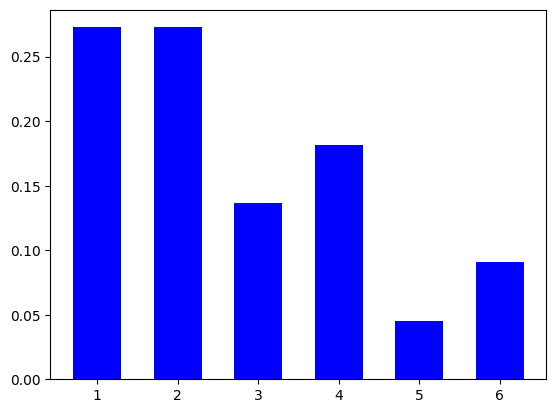

In [11]:
import numpy as np
from scipy.sparse.linalg import eigs
import pylab as plt
L = [(1,2),(2,3),(2,4),(3,4),(3,5),
   (3,6),(4,1),(5,6),(6,1)]
w = np.zeros((6,6))  #邻接矩阵初始化
for i in range(len(L)):
    w[L[i][0]-1,L[i][1]-1] = 1
r = np.sum(w,axis=1,keepdims=True)
P = w / r          #这里利用矩阵广播
val, vec= eigs(P.T,1); V=vec.real
V=V.flatten(); #展开成（n,)形式的数组
V=V/V.sum(); print("V=",np.round(V,4))
plt.bar(range(1,len(w)+1), V, width=0.6, color='b')
plt.show()

### 3.3 随即冲浪模型的PageRank值
PageRank 算法原理中有一个重要的假设：所有的网页形成一个闭合的链接图，除了这些文档以外没有其他任何链接的出入，并且每个网页能从其他网页通过超链接达到。但是在现实的网络中, 并不完全是这样的情况。当一个页面没有链出链接的时候, 它的PageRank 值就不能被分配给其它的页面。同样道理，只有出链接而没有入链接的页面也是存在的。

同时，有时候也有链接只在一个集合内部旋转而不向外界链接的现象。在现实中的页面，无论怎样顺着链接前进，仅仅顺着链接是绝对不能进入的页面群总归是存在的。PageRank技术为了解决这样的问题，提出用户的随机冲浪模型，用户虽然在大多数场合都顺着当前页面中的链接前进, 但有时会突然重新打开浏览器随机进入到完全无关的页面。Google 认为用户在85%的情况下沿着链接前进，但在15%的情况下会跳跃到无关的页面中。

用公式表示相应的转移概率矩阵为
$$
\vec{P} = \frac{1 - d}{N}ee^T + dP,
$$
其中，$e$为分量全为1的N维列向量，从而$ee^T$为全1矩阵，$d\in(0, 1)$为阻尼因子，